# Imports

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import pickle

# Visualization

In [51]:
#df = pd.read_csv('data.csv')
df_original = pd.read_csv('data.csv')
data = df_original.copy()

data

,262,148,2
0,339,175,2
1,312,123,2
2,275,119,2
3,233,292,1
4,184,244,1
...,...,...,...
4775,155,384,1
4776,210,223,1
4777,390,288,1
4778,110,314,1


In [52]:
df = data.rename(columns={'262': 'Coluna_1', '148': 'Coluna_2', '2': 'Target'})
#df.head(50)

In [53]:
df.isnull().sum() #verificando numero de nulos

Coluna_1    0
Coluna_2    0
Target      0
dtype: int64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4780 entries, 0 to 4779
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Coluna_1  4780 non-null   int64
 1   Coluna_2  4780 non-null   int64
 2   Target    4780 non-null   int64
dtypes: int64(3)
memory usage: 112.2 KB


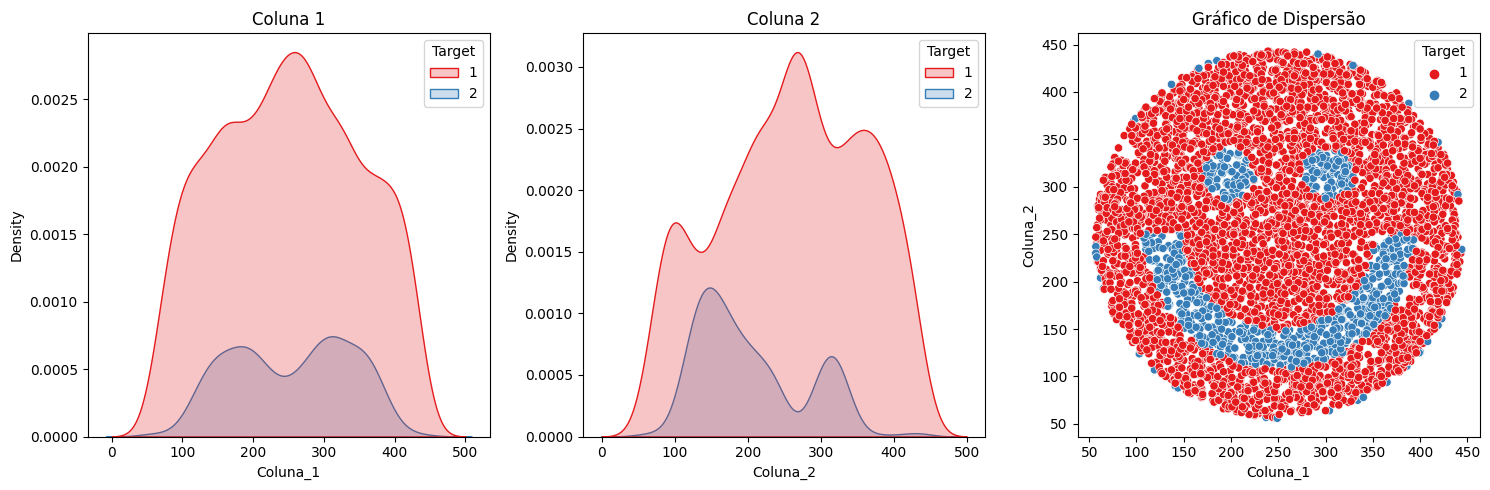

In [55]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.kdeplot(data=df, x='Coluna_1', hue='Target', fill=True, palette='Set1')
plt.title('Coluna 1')

plt.subplot(1, 3, 2)
sns.kdeplot(data=df, x='Coluna_2', hue='Target', fill=True, palette='Set1')
plt.title('Coluna 2')

plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='Coluna_1', y='Coluna_2', hue='Target', palette='Set1')

plt.title('Gráfico de Dispersão')

plt.tight_layout()
plt.show()

In [56]:
X = df[['Coluna_1', 'Coluna_2']]
y = df['Target']
count = y.value_counts()
count

Target
1    3949
2     831
Name: count, dtype: int64

# Classifiers and Metrics

In [57]:
X = df[['Coluna_1', 'Coluna_2']]
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Random Forests
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# MLP
mlp_model = MLPClassifier(activation='relu', alpha=1e-05, hidden_layer_sizes = (5,2), solver='adam', random_state=42, max_iter=800)
mlp_model.fit(X_train, y_train)

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predicts
y_rf_pred = rf_model.predict(X_test)
y_mlp_pred = mlp_model.predict(X_test)
y_nb_pred = nb_model.predict(X_test)

metrics_rf = {
    'Acurácia (RF)': accuracy_score(y_test, y_rf_pred),
    'Recall (RF)': recall_score(y_test, y_rf_pred),
    'Precisão (RF)': precision_score(y_test, y_rf_pred),
    'F1-Score (RF)': f1_score(y_test, y_rf_pred)
}

metrics_mlp = {
    'Acurácia (MLP)': accuracy_score(y_test, y_mlp_pred),
    'Recall (MLP)': recall_score(y_test, y_mlp_pred),
    'Precisão (MLP)': precision_score(y_test, y_mlp_pred),
    'F1-Score (MLP)': f1_score(y_test, y_mlp_pred)
}

metrics_nb = {
    'Acurácia (NB)': accuracy_score(y_test, y_nb_pred),
    'Recall (NB)': recall_score(y_test, y_nb_pred),
    'Precisão (NB)': precision_score(y_test, y_nb_pred),
    'F1-Score (NB)': f1_score(y_test, y_nb_pred)
}

print("======== Random Forests ========")
for metric, value in metrics_rf.items():
    print(f"{metric}: {value}")

print("\n============= MLP ==============")
for metric, value in metrics_mlp.items():
    print(f"{metric}: {value}")

print("\n========= Naive Bayes ==========")
for metric, value in metrics_nb.items():
    print(f"{metric}: {value}")


======== Random Forests ========
Acurácia (RF): 0.9764644351464435
Recall (RF): 0.9911392405063291
Precisão (RF): 0.9805886036318097
F1-Score (RF): 0.9858356940509915

============= MLP ==============
Acurácia (MLP): 0.8263598326359832
Recall (MLP): 1.0
Precisão (MLP): 0.8263598326359832
F1-Score (MLP): 0.9049255441008017

========= Naive Bayes ==========
Acurácia (NB): 0.8263598326359832
Recall (NB): 1.0
Precisão (NB): 0.8263598326359832
F1-Score (NB): 0.9049255441008017


In [58]:
with open('RandomForests_smile_metrica.pkl', 'wb') as arquivo:
    pickle.dump(metrics_rf , arquivo)

with open('MLP_smile_metrica .pkl', 'wb') as arquivo:
    pickle.dump(metrics_mlp , arquivo)

with open('NaiveBayes_smile_metrica.pkl', 'wb') as arquivo:
    pickle.dump(metrics_nb , arquivo)